#Setting up Files and Environment


In [ ]:
# Download the weight file from M2 – FA2
!wget https://github.com/MaePp2/yolov7-M2-SA/raw/main/yolov7z.pt

# Clone the github repository for YoloV7 + DeepSORT
!git clone https://github.com/deshwalmahesh/yolov7-deepsort-tracking
%cd yolov7-deepsort-tracking

# Mount the Google Drive to colab to access the test videos.
from google.colab import drive
drive.mount ("/content/drive")

--2023-01-17 12:23:05--  https://github.com/MaePp2/yolov7-M2-SA/raw/main/yolov7z.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MaePp2/yolov7-M2-SA/main/yolov7z.pt [following]
--2023-01-17 12:23:05--  https://media.githubusercontent.com/media/MaePp2/yolov7-M2-SA/main/yolov7z.pt
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142126951 (136M) [application/octet-stream]
Saving to: ‘yolov7z.pt’

yolov7z.pt          100%[===================>] 135.54M   206MB/s    in 0.7s    

2023-01-17 12:23:08 (206 MB/s) - ‘yolov7z.pt’ saved [142126951/142126951]

Cloning into 'yolov7-deepsort-

#Setting up the created YoloV7 Model as the Detector

In [ ]:
# Change the tracking_helpers.py before running this cell
from detection_helpers import *
from tracking_helpers import *
from bridge_wrapper import *
from PIL import Image

Fusing layers... 
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


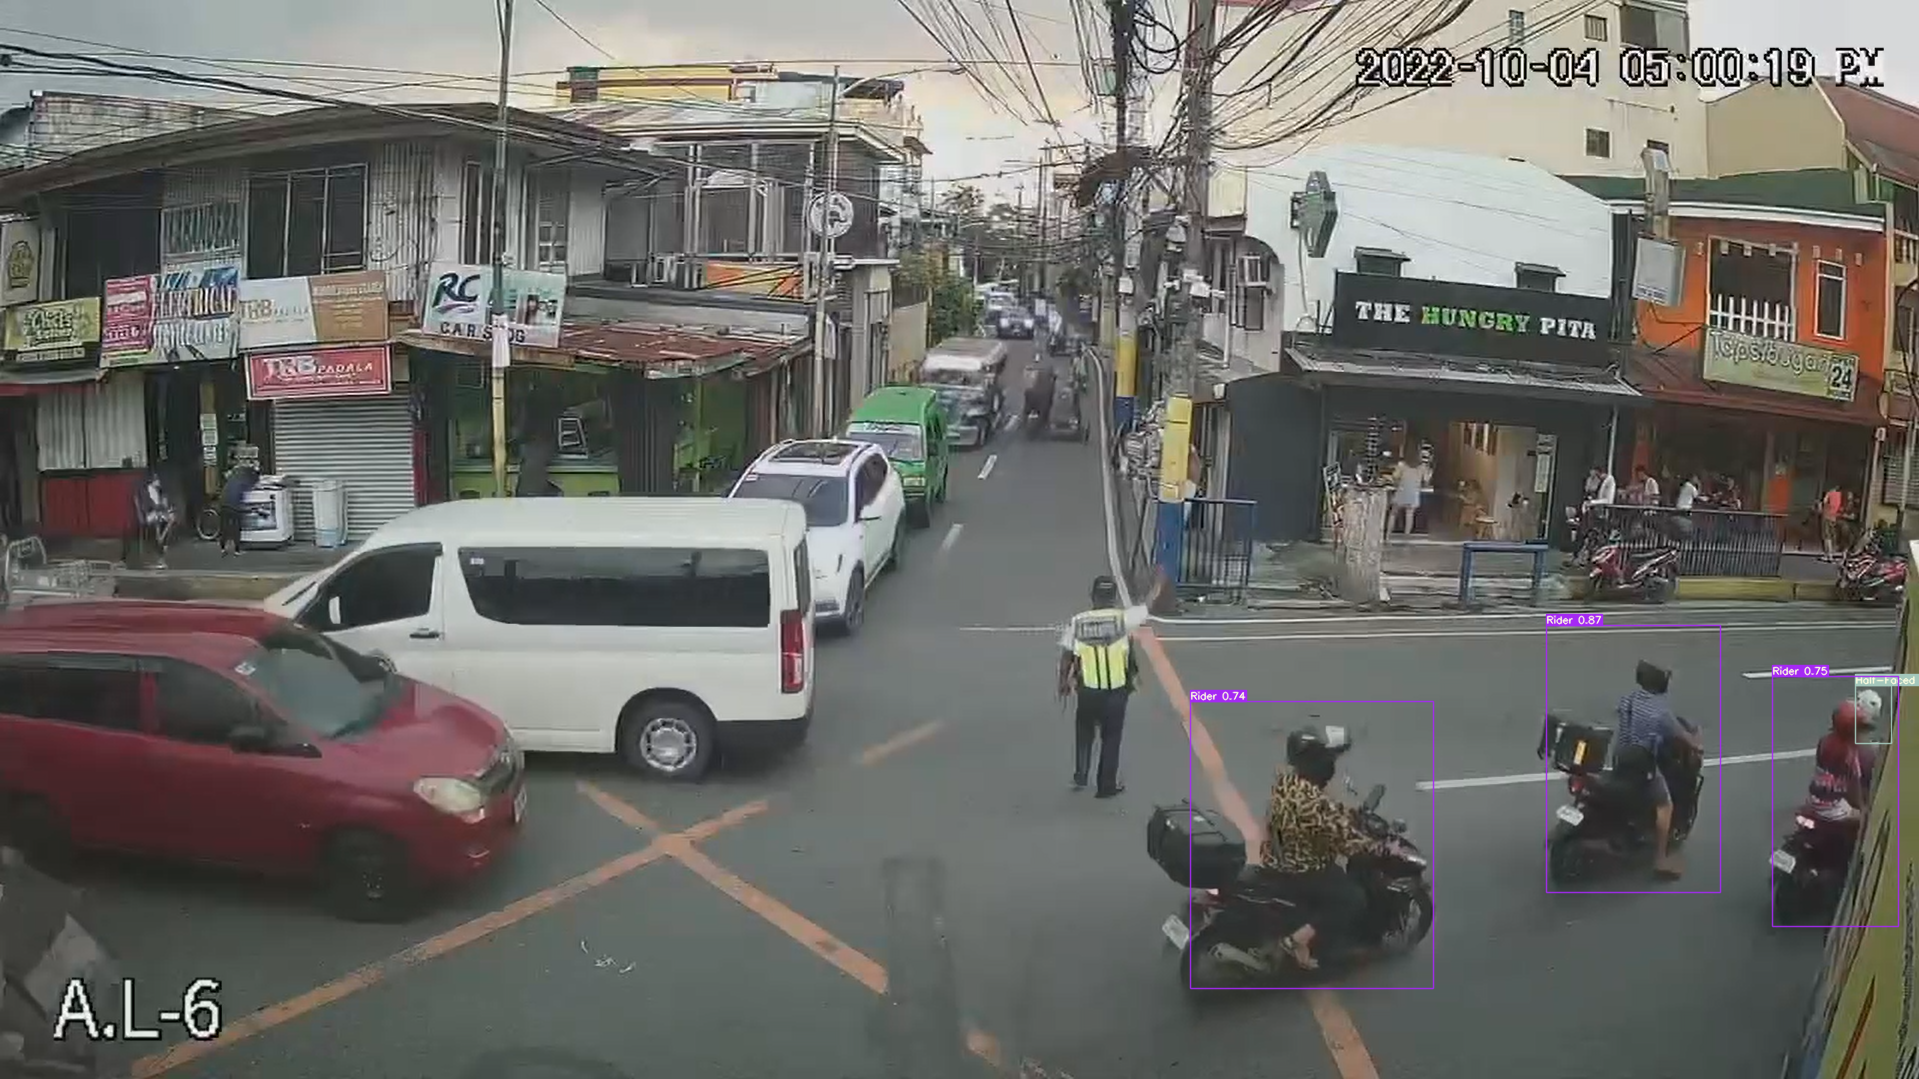

In [ ]:
detector = Detector()
model_path = '/content/yolov7z.pt'
detector.load_model(model_path,)

#Make sure that the detector is successfuly loaded try to detect with a test image
result = detector.detect('/content/drive/MyDrive/M2-SA/testvideos/testpic.png', plot_bb = True) # plot_bb = False output the predictions as [x,y,w,h, confidence, class]


if len(result.shape) == 3: # If it is image, convert it to proper image. detector will give "BGR" image
    result = Image.fromarray(cv2.cvtColor(result,cv2.COLOR_BGR2RGB)) 
  
#Print the detected test image
result

#Setting up the Tracker (DeepSORT)

In [ ]:
# Initialise class that binds detector and tracker in one class
# The tracker uses a pre trained DeepSORT model and the created detector with our custom YoloV7 Model
# DeepSORT uses the detections from the YoloV7 model as an input in order to track the object in a video.
tracker = YOLOv7_DeepSORT(reID_model_path="/content/yolov7-deepsort-tracking/deep_sort/model_weights/mars-small128.pb", detector=detector)


#Using the Tracker to Track the Test Videos


In [ ]:
# 5-6 Time Scenario, it will be saved as 5-6_Scenario.avi
tracker.track_video("/content/drive/MyDrive/M2-SA/testvideos/5-6PM.mp4", output="/content/drive/MyDrive/M2-SA/testvideos/5-6PM_Scenario.avi", show_live = False, skip_frames = 0, count_objects = True, verbose=2)
     

Streaming output truncated to the last 5000 lines.
Tracker ID: 2827, Class: Half-Faced,  BBox Coords (xmin, ymin, xmax, ymax): (1134, 379, 1155, 412)
Tracker ID: 2836, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (1204, 387, 1265, 498)
Tracker ID: 2928, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (252, 547, 449, 717)
Processed frame no: 3651 || Current FPS: 9.71 || Objects tracked: 8
Tracker ID: 2622, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (835, 323, 922, 432)
Tracker ID: 2772, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (958, 367, 1052, 489)
Tracker ID: 2817, Class: Full-Faced,  BBox Coords (xmin, ymin, xmax, ymax): (1001, 372, 1023, 407)
Tracker ID: 2823, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (1074, 377, 1167, 501)
Tracker ID: 2827, Class: Half-Faced,  BBox Coords (xmin, ymin, xmax, ymax): (1135, 380, 1155, 412)
Tracker ID: 2836, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (1203, 385, 1265, 498)
Tracker ID: 2928, Class: 

In [ ]:
# Second Scenario, it will be saved as TestScenario2.avi
tracker.track_video("/content/drive/MyDrive/M2-SA/testvideos/6-7PM.mp4", output="/content/drive/MyDrive/M2-SA/testvideos/6-7PM_Scenario.avi", show_live = False, skip_frames = 0, count_objects = True, verbose=2)
     

Streaming output truncated to the last 5000 lines.
Tracker ID: 3606, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (819, 352, 911, 465)
Processed frame no: 2217 || Current FPS: 15.69 || Objects tracked: 1
Tracker ID: 3606, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (822, 349, 915, 464)
Processed frame no: 2218 || Current FPS: 15.87 || Objects tracked: 1
Tracker ID: 3606, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (825, 347, 919, 464)
Tracker ID: 3624, Class: Full-Faced,  BBox Coords (xmin, ymin, xmax, ymax): (887, 347, 911, 385)
Processed frame no: 2219 || Current FPS: 12.4 || Objects tracked: 2
Tracker ID: 3606, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (825, 346, 920, 464)
Tracker ID: 3624, Class: Full-Faced,  BBox Coords (xmin, ymin, xmax, ymax): (887, 348, 911, 386)
Processed frame no: 2220 || Current FPS: 13.35 || Objects tracked: 2
Tracker ID: 3606, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (823, 348, 915, 463)
Tracker ID: 3624, Cl

In [ ]:
# Third Scenario, it will be saved as TestScenario3.avi
tracker.track_video("/content/drive/MyDrive/M2-SA/testvideos/7-8PM.mp4", output="/content/drive/MyDrive/M2-SA/testvideos/7-8PM_Scenario.avi", show_live = False, skip_frames = 0, count_objects = True, verbose=2)
     

Streaming output truncated to the last 5000 lines.
Tracker ID: 4156, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (76, 408, 176, 605)
Tracker ID: 4157, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (1174, 395, 1269, 553)
Tracker ID: 4159, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (835, 332, 915, 434)
Processed frame no: 2271 || Current FPS: 15.81 || Objects tracked: 8
Tracker ID: 4114, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (401, 487, 516, 720)
Tracker ID: 4118, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (329, 396, 436, 580)
Tracker ID: 4133, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (140, 373, 284, 538)
Tracker ID: 4135, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (1074, 406, 1165, 547)
Tracker ID: 4146, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (552, 392, 651, 549)
Tracker ID: 4156, Class: Rider,  BBox Coords (xmin, ymin, xmax, ymax): (78, 409, 178, 605)
Tracker ID: 4157, Class: Rider,  BBox Coords (xmin